In [1]:
%run ../__init__.ipynb

In [2]:
df_pockets = read_pockets()
print(df_pockets['pocket_score_bin'].value_counts())
phead(df_pockets)

pocket_score_bin
0 to 200       109481
200 to 400     109480
400 to 600     109480
600 to 800     109480
800 to 1000    109480
Name: count, dtype: int64
547,401 records


,0,1,2
uniprot_id,A0A024R1R8,A0A024R1R8,A0A024RBG1
struct_id,A0A024R1R8-F1,A0A024R1R8-F1,A0A024RBG1-F1
pocket_id,1,2,1
pocket_energy,50.329,37.488,244.37
pocket_n_points,159.0,108.0,561.0
pocket_rad_gyration,4.042788,3.175737,7.310256
pocket_energy_per_vol,0.316535,0.347111,0.435597
pocket_buriedness,0.772959,0.808219,0.856184
pocket_score,23.497914,22.21455,56.255444
pocket_cl_file,results/23.04_bindfunc/af2.obabel_hxr.autosite...,results/23.04_bindfunc/af2.obabel_hxr.autosite...,results/23.04_bindfunc/af2.obabel_hxr.autosite...


In [3]:
df_af2 = read_structures()

In [4]:
df_clinvar = read_clinvar() #read_Cheng2023_s5()#.head(5)
#df_clinvar[['uniprot_id', 'aa_pos', 'aa_ref', 'aa_alt']] = df_clinvar.apply(lambda r: parse_varstr(r['protein_variant']), axis=1, result_type='expand')

df_pathogenic = df_clinvar.query('clinvar_label == "Pathogenic"').groupby('Uniprot_id').agg(aa_pos = ('Amino_acid_position', lambda x: set((int(x_i) for x_i in x)))).reset_index()
df_benign = df_clinvar.query('clinvar_label == "Benign"').groupby('Uniprot_id').agg(aa_pos = ('Amino_acid_position', lambda x: set((int(x_i) for x_i in x)))).reset_index()

read_clinvar: 1,857,854 rows from /cluster/work/beltrao/jjaenes/23.06.02_clinvar/24.04.22_protvar_out/clinvar_mapped.tsv
read_clinvar: 1,761,408 after removing conflicting/other variants


In [9]:
data_clinvar_pathogenic_ = df_pockets.groupby('pocket_score_bin').apply(lambda pockets: fisher_var_resid(
    resid = pockets.set_index('uniprot_id')['pocket_resid'],
    var = df_pathogenic.set_index('Uniprot_id')['aa_pos'],
    all = df_af2.set_index('uniprot_id')['struct_resid'],
)).reset_index().assign(label='ClinVar pathogenic')
data_clinvar_pathogenic_

/scratch/tmp.59388024.jjaenes/ipykernel_172659/417705650.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_clinvar_pathogenic_ = df_pockets.groupby('pocket_score_bin').apply(lambda pockets: fisher_var_resid(


,pocket_score_bin,odds_ratio,pvalue,label
0,0 to 200,0.503029,9.289124e-186,ClinVar pathogenic
1,200 to 400,0.895772,2.029406e-09,ClinVar pathogenic
2,400 to 600,1.132154,6.474067e-14,ClinVar pathogenic
3,600 to 800,1.353144,1.434270e-92,ClinVar pathogenic
4,800 to 1000,1.975307,0.000000e+00,ClinVar pathogenic


In [10]:
data_clinvar_benign_ = df_pockets.groupby('pocket_score_bin').apply(lambda pockets: fisher_var_resid(
    resid = pockets.set_index('uniprot_id')['pocket_resid'],
    var = df_benign.set_index('Uniprot_id')['aa_pos'],
    all = df_af2.set_index('uniprot_id')['struct_resid'],
)).reset_index().assign(label='ClinVar benign')
data_clinvar_benign_

/scratch/tmp.59388024.jjaenes/ipykernel_172659/552489886.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_clinvar_benign_ = df_pockets.groupby('pocket_score_bin').apply(lambda pockets: fisher_var_resid(


,pocket_score_bin,odds_ratio,pvalue,label
0,0 to 200,0.892504,5.307931e-106,ClinVar benign
1,200 to 400,0.957812,2.117040e-20,ClinVar benign
2,400 to 600,0.984718,5.165503e-04,ClinVar benign
3,600 to 800,1.001647,6.888109e-01,ClinVar benign
4,800 to 1000,1.084498,1.165594e-128,ClinVar benign


In [11]:
df_ddd = read_Cheng2023_s6()#.head(5)
df_ddd[['uniprot_id', 'aa_pos', 'aa_ref', 'aa_alt']] = df_ddd.apply(lambda r: parse_varstr(r['protein_variant']), axis=1, result_type='expand')
df_ddd_pathogenic = df_ddd.query('label == 1').groupby('uniprot_id').agg(aa_pos = ('aa_pos', lambda x: set((int(x_i) for x_i in x)))).reset_index()
df_ddd_benign = df_ddd.query('label == 0').groupby('uniprot_id').agg(aa_pos = ('aa_pos', lambda x: set((int(x_i) for x_i in x)))).reset_index()
df_ddd_benign

,uniprot_id,aa_pos
0,O00329,"{772, 493, 176, 113, 1010, 437, 537, 830, 287}"
1,O00459,"{386, 67, 10, 655, 176, 499}"
2,O14497,"{906, 918, 283, 926, 1312, 1313, 1831, 1705, 4..."
3,O14522,"{1346, 1095, 1384, 522, 1020, 1039, 496, 370, ..."
4,O14686,"{1152, 1792, 3714, 765, 1934, 3727, 2191, 657,..."
...,...,...
185,Q9Y2L1,"{516, 101, 390, 711, 649, 524, 333, 882, 926, ..."
186,Q9Y448,"{121, 212}"
187,Q9Y4H2,"{512, 648, 1032, 793, 1068, 1328, 818, 821, 12..."
188,Q9Y6K1,"{646, 230, 144, 113, 114, 19, 821, 729, 734, 159}"


In [12]:
data_ddd_pathogenic_ = df_pockets.groupby('pocket_score_bin').apply(lambda pockets: fisher_var_resid(
    resid = pockets.set_index('uniprot_id')['pocket_resid'],
    var = df_ddd_pathogenic.set_index('uniprot_id')['aa_pos'],
    all = df_af2.set_index('uniprot_id')['struct_resid'],
)).reset_index().assign(label='DDD pathogenic')
data_ddd_pathogenic_

/scratch/tmp.59388024.jjaenes/ipykernel_172659/3094899228.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_ddd_pathogenic_ = df_pockets.groupby('pocket_score_bin').apply(lambda pockets: fisher_var_resid(


,pocket_score_bin,odds_ratio,pvalue,label
0,0 to 200,0.658773,2.669861e-03,DDD pathogenic
1,200 to 400,1.046013,6.620932e-01,DDD pathogenic
2,400 to 600,1.170093,1.160032e-01,DDD pathogenic
3,600 to 800,1.848782,5.109631e-13,DDD pathogenic
4,800 to 1000,2.842547,3.365020e-49,DDD pathogenic


In [13]:
data_ddd_benign_ = df_pockets.groupby('pocket_score_bin').apply(lambda pockets: fisher_var_resid(
    resid = pockets.set_index('uniprot_id')['pocket_resid'],
    var = df_ddd_benign.set_index('uniprot_id')['aa_pos'],
    all = df_af2.set_index('uniprot_id')['struct_resid'],
)).reset_index().assign(label='DDD benign')
data_ddd_benign_

/scratch/tmp.59388024.jjaenes/ipykernel_172659/2718394837.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_ddd_benign_ = df_pockets.groupby('pocket_score_bin').apply(lambda pockets: fisher_var_resid(


,pocket_score_bin,odds_ratio,pvalue,label
0,0 to 200,1.255349,0.006535,DDD benign
1,200 to 400,0.951028,0.569805,DDD benign
2,400 to 600,0.759345,0.001219,DDD benign
3,600 to 800,0.911384,0.232265,DDD benign
4,800 to 1000,0.960022,0.528718,DDD benign


In [16]:
df_pharmgkb_ = pd.read_csv('/cluster/project/beltrao/jjaenes/22.12_pocketomes/resources/pharmgkb/clinicalAnnotations_mapped.tsv', sep='\t')#.query(q_)
#.query('`Evidence Count` > 5')
#df_var[['uniprot_id', 'aa_pos', 'aa_ref', 'aa_alt']] = df_var.apply(lambda r: parse_varstr(r['protein_variant']), axis=1, result_type='expand')
#df_pathogenic = df_var.query('label == 1').groupby('uniprot_id').agg(aa_pos = ('aa_pos', lambda x: set((int(x_i) for x_i in x)))).reset_index()
#df_benign = df_var.query('label == 0').groupby('uniprot_id').agg(aa_pos = ('aa_pos', lambda x: set((int(x_i) for x_i in x)))).reset_index()
#phead(df_var)

df_pharmgkb = df_pharmgkb_.groupby('Uniprot_canonical_isoform_(non_canonical)').agg(
    Amino_acid_position = ('Amino_acid_position', lambda x: set((int(x_i) for x_i in x)))
).reset_index()

In [21]:
df_pharmgkb_ = read_pharmgkb()
df_pharmgkb_[['uniprot_id', 'aa_pos', 'aa_ref', 'aa_alt']] = df_pharmgkb_.apply(lambda r: parse_varstr(r['variant_id']), axis=1, result_type='expand')

df_pharmgkb = df_pharmgkb_.groupby('uniprot_id').agg(
    Amino_acid_position = ('aa_pos', lambda x: set((int(x_i) for x_i in x)))
).reset_index()

In [24]:
data_pharmgkb_ = df_pockets.groupby('pocket_score_bin').apply(lambda pockets: fisher_var_resid(
    resid = pockets.set_index('uniprot_id')['pocket_resid'],
    var = df_pharmgkb.set_index('uniprot_id')['Amino_acid_position'],
    all = df_af2.set_index('uniprot_id')['struct_resid'],
)).reset_index().assign(label='PharmGKB')
data_pharmgkb_

/scratch/tmp.59388024.jjaenes/ipykernel_172659/1935708336.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_pharmgkb_ = df_pockets.groupby('pocket_score_bin').apply(lambda pockets: fisher_var_resid(


,pocket_score_bin,odds_ratio,pvalue,label
0,0 to 200,0.751977,7.918608e-02,PharmGKB
1,200 to 400,0.842618,2.247459e-01,PharmGKB
2,400 to 600,1.265756,4.289223e-02,PharmGKB
3,600 to 800,1.746638,2.686630e-08,PharmGKB
4,800 to 1000,1.927376,2.323412e-14,PharmGKB


/cluster/project/beltrao/jjaenes/software/miniconda3/envs/af2genomics-env/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/cluster/project/beltrao/jjaenes/software/miniconda3/envs/af2genomics-env/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


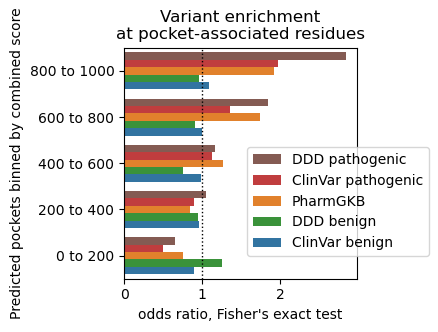

In [25]:
data_ = pd.concat([
    data_ddd_pathogenic_,
    data_clinvar_pathogenic_,
    data_pharmgkb_,
    data_ddd_benign_,
    data_clinvar_benign_,
], axis=0)

palette_ = {
    'ClinVar pathogenic': 'tab:red',
    'DDD pathogenic': 'tab:brown',
    'PharmGKB': 'tab:orange',
    'ClinVar benign': 'tab:blue',
    'DDD benign': 'tab:green',
}

order_ = ['800 to 1000', '600 to 800', '400 to 600', '200 to 400', '0 to 200']

plt.figure(figsize=(3, 3))
plt.subplot(1, 1, 1)
plt.title(f'Variant enrichment\nat pocket-associated residues')
sns.barplot(data_.reset_index(), x='odds_ratio', y='pocket_score_bin', hue='label', palette=palette_, order=order_)
plt.gca().set_xlabel('odds ratio, Fisher\'s exact test')
plt.gca().set_ylabel('Predicted pockets binned by combined score')
plt.gca().legend(bbox_to_anchor=(0.5, 0.6))
plt.axvline(1, color='k', linewidth=1, linestyle='dotted')
plt.savefig('pocket_enrichment_.svg', bbox_inches='tight', transparent=True)